### This notebook consists of a classification model for 101 food classes (10% data)

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/Food Datasets/101_food_classes_10_percent.zip"

Streaming output truncated to the last 5000 lines.
  inflating: 101_food_classes_10_percent/train/beet_salad/2450020.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/550087.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/3132380.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/44885.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/1967147.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/1422905.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/1380319.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/1336726.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/2808614.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/66574.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/3537144.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/3165387.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/3391241.jpg  
  inflating: 101_f

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_dir = "/content/101_food_classes_10_percent/train"

test_dir = "/content/101_food_classes_10_percent/test"

In [ ]:
train_data = image_dataset_from_directory(directory = train_dir,
                                          batch_size = 32,
                                          image_size = (224,224),
                                          label_mode = "categorical")

test_data = image_dataset_from_directory(directory = test_dir,
                                         batch_size = 32,
                                         image_size = (224,224),
                                         label_mode = "categorical")

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
class_names = train_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_augmentation = tf.keras.Sequential([
                              preprocessing.RandomFlip("horizontal"),
                              preprocessing.RandomZoom(0.2),
                              preprocessing.RandomHeight(0.2),
                              preprocessing.RandomWidth(0.2),
                              preprocessing.RandomRotation(0.2)
],name = "data_augmentation")

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3),name = "input_layer")

x = data_augmentation(inputs)

x = base_model(x) 

x = tf.keras.layers.GlobalAveragePooling2D(name = "Global_Average_Pooling_2D")(x)

outputs = tf.keras.layers.Dense(len(class_names),activation = "softmax",name = "output_layer")(x)

model = tf.keras.Model(inputs,outputs)

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
Global_Average_Pooling_2D (G (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 101)               129381    
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

In [ ]:
history = model.fit(train_data,
                    epochs = 5,
                    validation_data = test_data,
                    validation_steps = int(0.15*len(test_data)))

Epoch 1/5
237/237 [==============================] - 121s 363ms/step - loss: 3.5488 - accuracy: 0.2267 - val_loss: 2.4846 - val_accuracy: 0.4568
Epoch 2/5
237/237 [==============================] - 70s 295ms/step - loss: 2.4392 - accuracy: 0.4450 - val_loss: 2.0492 - val_accuracy: 0.5146
Epoch 3/5
237/237 [==============================] - 65s 275ms/step - loss: 2.0777 - accuracy: 0.5027 - val_loss: 1.8808 - val_accuracy: 0.5310
Epoch 4/5
237/237 [==============================] - 63s 264ms/step - loss: 1.8719 - accuracy: 0.5439 - val_loss: 1.8016 - val_accuracy: 0.5477
Epoch 5/5
237/237 [==============================] - 59s 248ms/step - loss: 1.7311 - accuracy: 0.5834 - val_loss: 1.7519 - val_accuracy: 0.5508


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
Global_Average_Pooling_2D (G (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 101)               129381    
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 90s 114ms/step - loss: 1.7164 - accuracy: 0.5530


[1.7164130210876465, 0.5529505014419556]

In [ ]:
# We get an accuracy of around 55% on just 10% of the data with 101 classes.

# The results are better than the Food Vision paper which had 50% accuracy with 100% data using Random Forests.

### Fine Tuning

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
# recompile

model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ["accuracy"])

In [ ]:
fine_tuning_epochs = 10

history2 = model.fit(train_data,
                     epochs = fine_tuning_epochs,
                     validation_data = test_data,
                     validation_steps = int(0.1*len(test_data)),
                     initial_epoch = history.epoch[-1])

Epoch 5/10
237/237 [==============================] - 60s 226ms/step - loss: 1.6481 - accuracy: 0.6009 - val_loss: 1.6886 - val_accuracy: 0.5574
Epoch 6/10
237/237 [==============================] - 51s 214ms/step - loss: 1.4801 - accuracy: 0.6352 - val_loss: 1.6614 - val_accuracy: 0.5688
Epoch 7/10
237/237 [==============================] - 51s 214ms/step - loss: 1.3948 - accuracy: 0.6574 - val_loss: 1.6298 - val_accuracy: 0.5712
Epoch 8/10
237/237 [==============================] - 49s 205ms/step - loss: 1.3288 - accuracy: 0.6717 - val_loss: 1.6121 - val_accuracy: 0.5724
Epoch 9/10
237/237 [==============================] - 47s 196ms/step - loss: 1.2666 - accuracy: 0.6820 - val_loss: 1.5910 - val_accuracy: 0.5779
Epoch 10/10
237/237 [==============================] - 46s 193ms/step - loss: 1.2136 - accuracy: 0.6957 - val_loss: 1.5625 - val_accuracy: 0.5831


In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 87s 109ms/step - loss: 1.5242 - accuracy: 0.5915


[1.5241960287094116, 0.5914851427078247]

In [ ]:
# We get around 59% accuracy after fine tuning which is a slight boost from the feature extraction model

In [ ]:
model.save("/content/drive/MyDrive/Models/FoodVision101_1")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/FoodVision101_1/assets


In [ ]:
# Function to make confusion matrix

import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
pred_probs = model.predict(test_data, verbose=1)

pred_classes = pred_probs.argmax(axis=1)

790/790 [==============================] - 59s 72ms/step


In [ ]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10]

[18, 11, 27, 14, 45, 76, 3, 63, 26, 87]

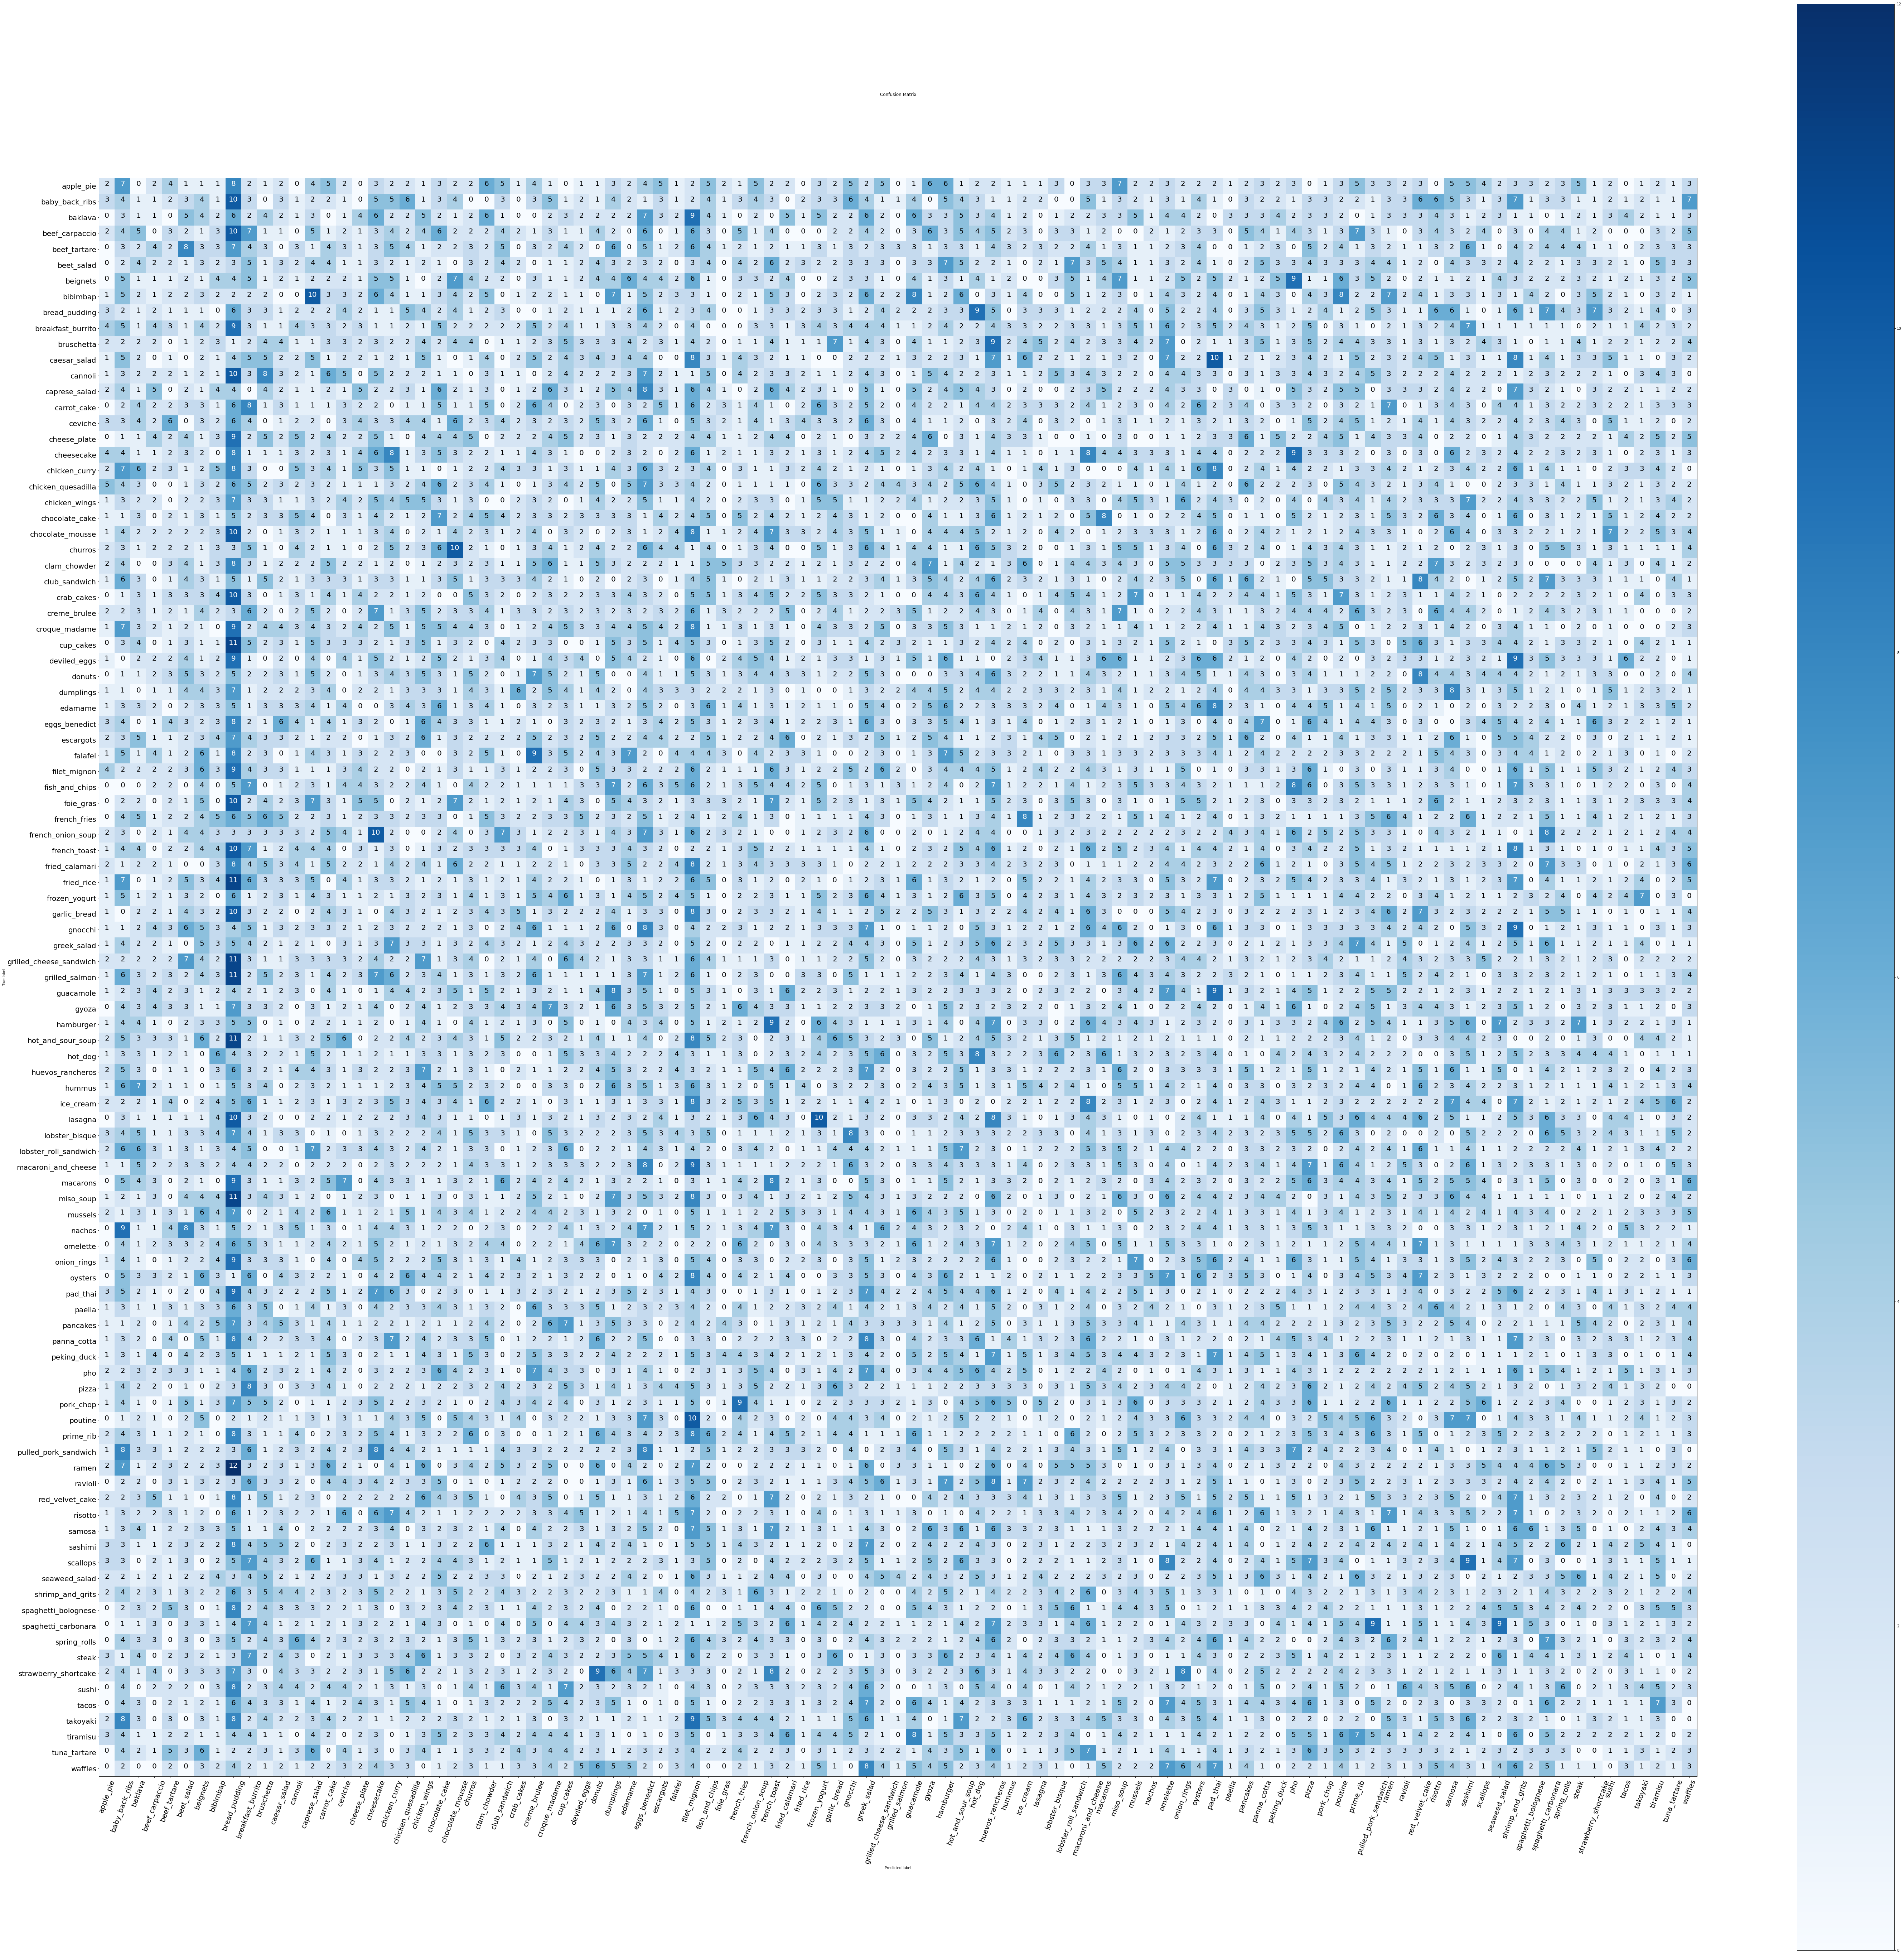

In [ ]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

confusion_matrix.png

In [ ]:
# Trying on custom images

import matplotlib.pyplot as plt

# ONLY SCALE IF NEEDED. EFFICIENTNET DOES NOT NEED SCALING AS IT SCALES ON ITS OWN AND THUS SCALING TWICE WILL GIVE INCORRECT RESULTS

def load_image(file_path):

  img = tf.io.read_file(file_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size = [224,224])

  # img = img/255.

  return img
  
def predict_and_plot(model,file_path):

  img = load_image(file_path)

  pred = model.predict(tf.expand_dims(img,axis = 0))

  prediction = class_names[pred[0].argmax()]

  plt.figure()
  plt.imshow(img/255.)
  plt.axis("off")
  plt.title(prediction)


  

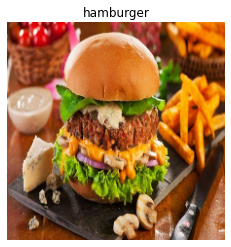

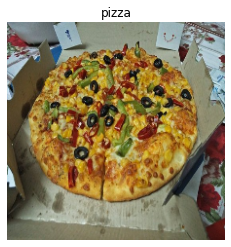

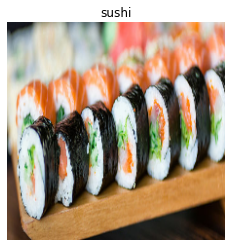

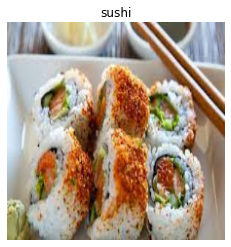

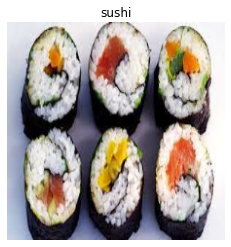

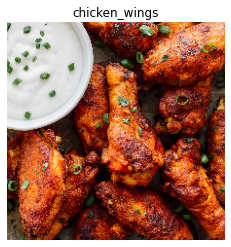

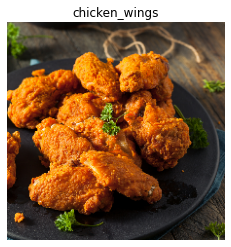

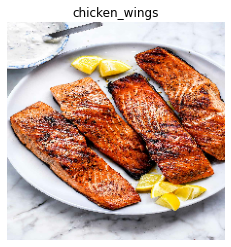

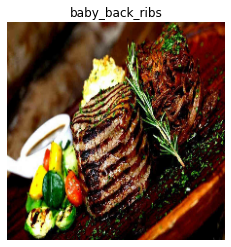

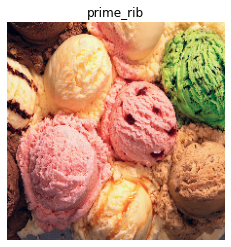

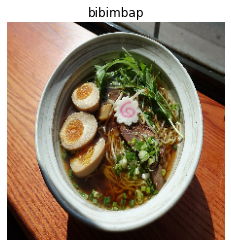

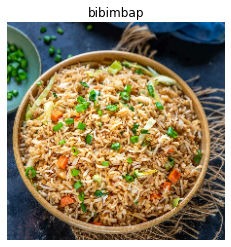

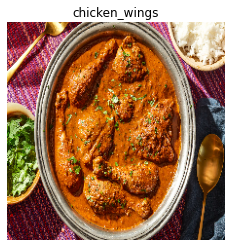

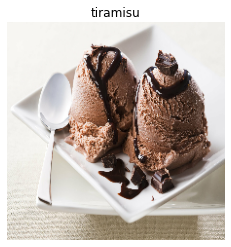

In [ ]:
# Trying on custom images
import os
custom_images_path = "/content/drive/MyDrive/Datasets/Food Datasets/Custom_Images"

for image in os.listdir(custom_images_path):
  image_path = custom_images_path+"/"+image
  predict_and_plot(model,image_path)

In [ ]:
# The results are decent considering only 10% of the data has been used.

# The model gets confused in images of food that are very similar. Eg ramen and bibimbap or chicke wings and chicken curry or steak and baby back ribs,etc

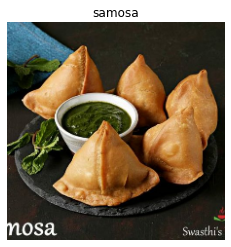

In [ ]:
# Trying to identify samsoa ;)

img_path = "/content/samosa.jpg"

predict_and_plot(model,img_path)

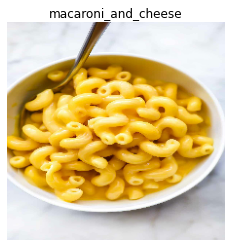

In [ ]:
img2_path = "/content/macroni.jpg"

predict_and_plot(model,img2_path)

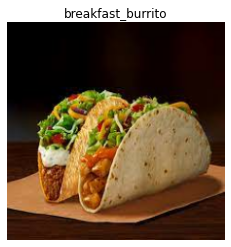

In [ ]:
img3_path = "/content/taco.jpg"

predict_and_plot(model,img3_path)

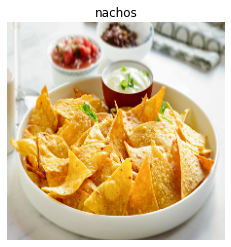

In [ ]:
img4_path = "/content/nachos.jpg"

predict_and_plot(model,img4_path)

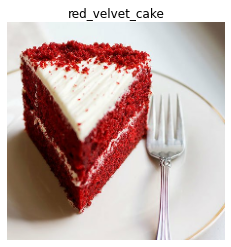

In [ ]:
img5_path = "/content/redcake.jpg"

predict_and_plot(model,img5_path)